In [1]:
import pandas as pd #To import data

#for heat map:
import folium
from folium.plugins import HeatMap, HeatMapWithTime
#Calenderplot:
import calplot

import numpy as np #used for polar plot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # Creating color bar

### Import data

In [ ]:
# Specify the full path to the CSV file
file_path = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\blix-visits.csv"

# Read data from the specified file
df = pd.read_csv(file_path)

# counts rows and columns
print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}")

# Preview the first 5 lines of the loaded data
df.head()

Total number of rows: 122758
Total number of columns: 8


datetime  venueId  total  dwell  \
0  2022-12-16T13:00:00+11:00     7779    217  52297   
1  2022-12-16T13:00:00+11:00     8171     48   9840   
2  2022-12-16T05:00:00+11:00     8171      6   1800   
3  2022-12-16T16:00:00+11:00     8171     95  52155   
4  2022-12-16T07:00:00+11:00     8168      0      0   

                        Sensor Name            Sensor Type  \
0     Pedestrian Sensor- Harbur Esp  Mobile phone counting   
1  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
2  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
3  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
4     Pedestrian Sensor - Microlabs  Mobile phone counting   

                   Lat Long  avg_dwell  
0  -37.8144123, 144.9443643        4.0  
1  -37.8209898, 144.9759397        3.0  
2  -37.8209898, 144.9759397        5.0  
3  -37.8209898, 144.9759397        9.0  
4  -37.8132759, 144.9670433        NaN

### Remove NaN data

In [3]:
df_cleaned = df.dropna(subset=['Sensor Name', 'Sensor Type', 'Lat Long'])

# Save
df_cleaned.to_csv("blix-visits_cleaned.csv", index=False)

print(f"Total number of rows: {df_cleaned.shape[0]}")
print(f"Total number of columns: {df_cleaned.shape[1]}")

df_cleaned.head()

Total number of rows: 97625
Total number of columns: 8


datetime  venueId  total  dwell  \
0  2022-12-16T13:00:00+11:00     7779    217  52297   
1  2022-12-16T13:00:00+11:00     8171     48   9840   
2  2022-12-16T05:00:00+11:00     8171      6   1800   
3  2022-12-16T16:00:00+11:00     8171     95  52155   
4  2022-12-16T07:00:00+11:00     8168      0      0   

                        Sensor Name            Sensor Type  \
0     Pedestrian Sensor- Harbur Esp  Mobile phone counting   
1  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
2  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
3  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
4     Pedestrian Sensor - Microlabs  Mobile phone counting   

                   Lat Long  avg_dwell  
0  -37.8144123, 144.9443643        4.0  
1  -37.8209898, 144.9759397        3.0  
2  -37.8209898, 144.9759397        5.0  
3  -37.8209898, 144.9759397        9.0  
4  -37.8132759, 144.9670433        NaN

### Maps

In [4]:
# Coordinates for Melbourne (Googled)
mel_latitude = -37.840935
mel_longitude = 144.946457

# Create a map centered on Melbourne
mel_map = folium.Map(location=[mel_latitude, mel_longitude], zoom_start=13)
mel_map = folium.Map(location=[mel_latitude, mel_longitude], zoom_start=13)

# motify the data
#df_cleaned[['Latitude', 'Longitude']] = df_cleaned['Lat Long'].str.split(',', expand=True) #split to strings
df_cleaned[['Latitude', 'Longitude']] = df_cleaned['Lat Long'].str.split(',', expand=True).astype(float) #splits to float
#both works though

#for index, row in df_cleaned.iterrows(): #Sets "NaN" in avg_dwell to 0 is total is also 0 
#    if pd.isna(row['avg_dwell']) and row['total'] == 0:
#        df_cleaned.at[index, 'avg_dwell'] = 0

# Prepare data for the heatmap
heat_data = df_cleaned[['Latitude', 'Longitude']].values.tolist()

# Add the heatmap to the map
HeatMap(heat_data, radius=10, blur=5).add_to(mel_map)

# Display the map
mel_map

C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\2006115963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Latitude', 'Longitude']] = df_cleaned['Lat Long'].str.split(',', expand=True).astype(float) #splits to float
C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\2006115963.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Latitude', 'Longitude']] = df_cleaned['Lat Long'].str.split(',', expand=True).astype(float) #splits to float


In [5]:
unique_coordinates = df['Lat Long'].dropna().unique()
num_unique_coordinates = len(unique_coordinates)
unique_coordinates, num_unique_coordinates

(array(['-37.8144123, 144.9443643', '-37.8209898, 144.9759397',
        '-37.8132759, 144.9670433', '-37.8303795, 144.9735707',
        '-37.8025805, 144.9656012', '-37.8304842, 144.9732589'],
       dtype=object),
 6)

In [6]:
# Startkort – centreret omkring gennemsnittet af koordinaterne
map_center = [-37.815, 144.97]
m = folium.Map(location=map_center, zoom_start=14)

# Tilføj markører
for coord in unique_coordinates:
    lat, lon = map(float, coord.split(','))
    folium.Marker(location=[lat, lon], popup=coord).add_to(m)

# Vis kortet (i Jupyter Notebook)
m


### Focus only on the park

In [7]:
#This is the coordinates for the park -37.8025805, 144.9656012

#These two codes do the same thing:
#df_park = df_cleaned[df_cleaned['Lat Long'] == '-37.8025805, 144.9656012']
df_park = df_cleaned[df_cleaned['Sensor Name'] == 'Pedestrian Sensor-Argyle Sq']

print(f"Total number of rows: {df_park.shape[0]}")
print(f"Total number of columns: {df_park.shape[1]}")

df_park.head()

Total number of rows: 20336
Total number of columns: 10


datetime  venueId  total   dwell  \
7   2022-12-16T21:00:00+11:00     7780    422  107188   
18  2022-12-23T14:00:00+11:00     7780    351  170937   
19  2022-12-23T21:00:00+11:00     7780    504  193032   
30  2022-12-28T03:00:00+11:00     7780     13    2574   
31  2022-12-28T04:00:00+11:00     7780      5    2340   

                    Sensor Name            Sensor Type  \
7   Pedestrian Sensor-Argyle Sq  Mobile phone counting   
18  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
19  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
30  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
31  Pedestrian Sensor-Argyle Sq  Mobile phone counting   

                    Lat Long  avg_dwell  Latitude   Longitude  
7   -37.8025805, 144.9656012        4.0 -37.80258  144.965601  
18  -37.8025805, 144.9656012        8.0 -37.80258  144.965601  
19  -37.8025805, 144.9656012        6.0 -37.80258  144.965601  
30  -37.8025805, 144.9656012        3.0 -37.80258  144.965601  
31  -37.8025805, 144.9656012        7.0 -37.80258  144.965601

### Calender/time plots

In [8]:
#Fordi den splittet som tekst streng istedet:
#df_park[['date', 'time']] = df_park['datetime'].str.split('T', expand=True)

df_park['datetime'] = pd.to_datetime(df_park['datetime'], utc=True)
df_park['datetime'] = df_park['datetime'].dt.tz_convert('Australia/Melbourne')

df_park['date'] = df_park['datetime'].dt.date
df_park['time'] = df_park['datetime'].dt.time


print(f"Total number of rows: {df_park.shape[0]}")
print(f"Total number of columns: {df_park.shape[1]}")

#Slet:
#print(f"Minimum avg_dwell: {df_park['avg_dwell'].min():.2f}")
#print(f"Maximum avg_dwell: {df_park['avg_dwell'].max():.2f}")

#min_row = df_park.loc[df_park['avg_dwell'].idxmin()]
#max_row = df_park.loc[df_park['avg_dwell'].idxmax()]

#print(f"Minimum avg_dwell: {min_row['avg_dwell']:.2f} at {min_row['datetime']}")
#print(f"Maximum avg_dwell: {max_row['avg_dwell']:.2f} at {max_row['datetime']}")


df_park.head()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\980373467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['datetime'] = pd.to_datetime(df_park['datetime'], utc=True)


Total number of rows: 20336
Total number of columns: 12


C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\980373467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['datetime'] = df_park['datetime'].dt.tz_convert('Australia/Melbourne')
C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\980373467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['date'] = df_park['datetime'].dt.date
C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\980373467.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

datetime  venueId  total   dwell  \
7  2022-12-16 21:00:00+11:00     7780    422  107188   
18 2022-12-23 14:00:00+11:00     7780    351  170937   
19 2022-12-23 21:00:00+11:00     7780    504  193032   
30 2022-12-28 03:00:00+11:00     7780     13    2574   
31 2022-12-28 04:00:00+11:00     7780      5    2340   

                    Sensor Name            Sensor Type  \
7   Pedestrian Sensor-Argyle Sq  Mobile phone counting   
18  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
19  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
30  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
31  Pedestrian Sensor-Argyle Sq  Mobile phone counting   

                    Lat Long  avg_dwell  Latitude   Longitude        date  \
7   -37.8025805, 144.9656012        4.0 -37.80258  144.965601  2022-12-16   
18  -37.8025805, 144.9656012        8.0 -37.80258  144.965601  2022-12-23   
19  -37.8025805, 144.9656012        6.0 -37.80258  144.965601  2022-12-23   
30  -37.8025805, 144.9656012        3.0 -37.80258  144.965601  2022-12-28   
31  -37.8025805, 144.9656012        7.0 -37.80258  144.965601  2022-12-28   

        time  
7   21:00:00  
18  14:00:00  
19  21:00:00  
30  03:00:00  
31  04:00:00

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1000x510 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


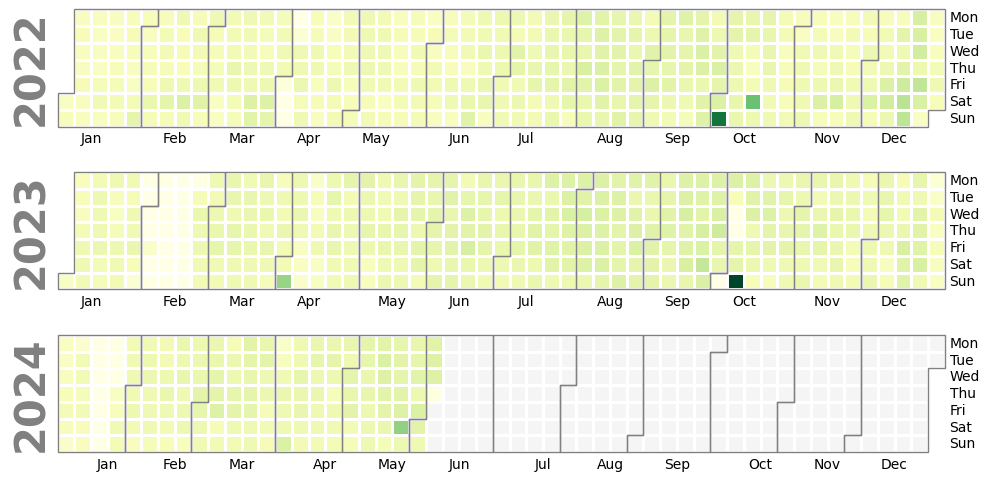

In [9]:
# Gruppér og lav events-serie
events = df_park.groupby('date')['total'].sum()
events.index = pd.to_datetime(events.index)

# Plot
calplot.calplot(events, cmap='YlGn', colorbar=False)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1000x510 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


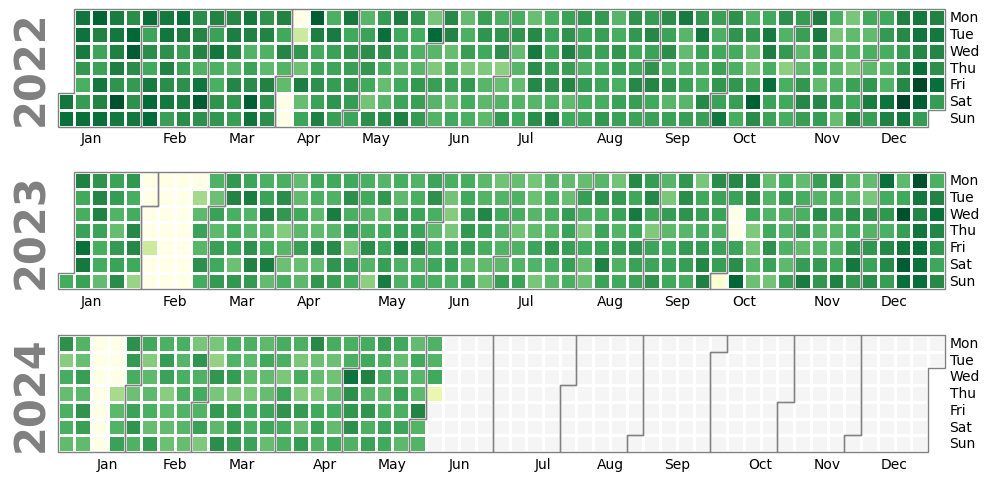

In [10]:
# Gruppér og lav events-serie
events = df_park.groupby('date')['avg_dwell'].sum()

events.index = pd.to_datetime(events.index)

# Plot
calplot.calplot(events, cmap='YlGn', colorbar=False)

C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\2283780068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['hour'] = pd.to_datetime(df_park['datetime']).dt.hour


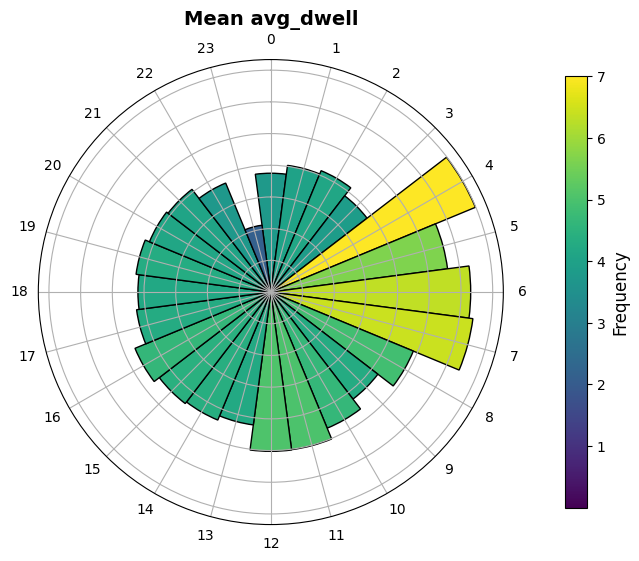

In [38]:
df_park['hour'] = pd.to_datetime(df_park['datetime']).dt.hour
#hours = df_park.groupby('hour')['total'].sum()
hours = df_park.groupby('hour')['avg_dwell'].mean()

#hours = df_park['time'].value_counts().sort_index()
angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)
widths = np.pi / 12 
colors = plt.cm.viridis(hours.values / hours.values.max())

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hours.values, width=widths, color=colors, edgecolor='black')

# Make the chart look like a clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Add a color bar
#sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(vmin=hours.values.min(), vmax=hours.values.max()))
sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(0, 7))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Frequency',fontsize=12)
cbar.set_ticks([1, 2, 3, 4, 5, 6, 7])  # Eksplícit angivelse af ticks
#cbar.set_ticks(np.arange(hours.values.min(), hours.values.max() + 1, 1))

# Set labels and title
ax.set_xticks(angles)
ax.set_xticklabels(hours.index, fontsize=10)
ax.set_yticklabels([])
ax.set_title('Mean avg_dwell', fontsize=14, fontweight='bold')

# Show plot
plt.show()

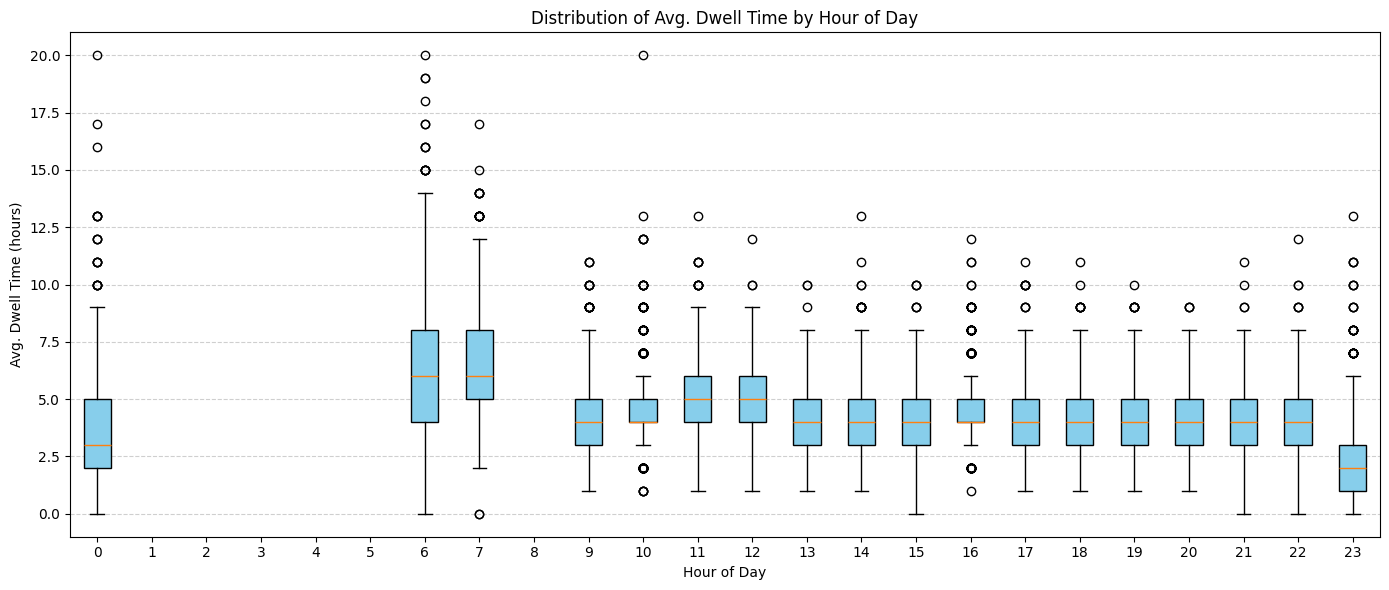

In [39]:
# Opret liste over 24 arrays med avg_dwell for hver time
hourly_data = [df_park[df_park['hour'] == h]['avg_dwell'].values for h in range(24)]

# Plot boksplots
plt.figure(figsize=(14, 6))
plt.boxplot(hourly_data, patch_artist=True, boxprops=dict(facecolor='skyblue'))

plt.xticks(ticks=range(1, 25), labels=range(24))  # x-akse: timer (0–23)
plt.xlabel('Hour of Day')
plt.ylabel('Avg. Dwell Time (hours)')
plt.title('Distribution of Avg. Dwell Time by Hour of Day')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [13]:
print(df_park['hour'].value_counts().sort_index())


hour
0     848
1     848
2     846
3     847
4     847
5     847
6     848
7     848
8     848
9     847
10    849
11    848
12    848
13    848
14    849
15    849
16    848
17    848
18    847
19    847
20    846
21    845
22    845
23    845
Name: count, dtype: int64


In [14]:
for h in range(24):
    values = df_park[df_park['hour'] == h]['avg_dwell']
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    iqr = q3 - q1
    print(f"Hour {h:02d}: Q1={q1:.2f}, Q3={q3:.2f}, IQR={iqr:.2f}")


Hour 00: Q1=2.00, Q3=5.00, IQR=3.00
Hour 01: Q1=2.00, Q3=6.00, IQR=4.00
Hour 02: Q1=1.00, Q3=6.00, IQR=5.00
Hour 03: Q1=1.00, Q3=6.00, IQR=5.00
Hour 04: Q1=2.00, Q3=10.00, IQR=8.00
Hour 05: Q1=3.00, Q3=8.00, IQR=5.00
Hour 06: Q1=4.00, Q3=8.00, IQR=4.00
Hour 07: Q1=5.00, Q3=8.00, IQR=3.00
Hour 08: Q1=4.00, Q3=6.00, IQR=2.00
Hour 09: Q1=3.00, Q3=5.00, IQR=2.00
Hour 10: Q1=4.00, Q3=5.00, IQR=1.00
Hour 11: Q1=4.00, Q3=6.00, IQR=2.00
Hour 12: Q1=4.00, Q3=6.00, IQR=2.00
Hour 13: Q1=3.00, Q3=5.00, IQR=2.00
Hour 14: Q1=3.00, Q3=5.00, IQR=2.00
Hour 15: Q1=3.00, Q3=5.00, IQR=2.00
Hour 16: Q1=4.00, Q3=5.00, IQR=1.00
Hour 17: Q1=3.00, Q3=5.00, IQR=2.00
Hour 18: Q1=3.00, Q3=5.00, IQR=2.00
Hour 19: Q1=3.00, Q3=5.00, IQR=2.00
Hour 20: Q1=3.00, Q3=5.00, IQR=2.00
Hour 21: Q1=3.00, Q3=5.00, IQR=2.00
Hour 22: Q1=3.00, Q3=5.00, IQR=2.00
Hour 23: Q1=1.00, Q3=3.00, IQR=2.00


In [29]:
for h, arr in enumerate(hourly_data):
    print(f"Hour {h}: type={type(arr)}, len={len(arr)}")


Hour 0: type=<class 'numpy.ndarray'>, len=848
Hour 1: type=<class 'numpy.ndarray'>, len=848
Hour 2: type=<class 'numpy.ndarray'>, len=846
Hour 3: type=<class 'numpy.ndarray'>, len=847
Hour 4: type=<class 'numpy.ndarray'>, len=847
Hour 5: type=<class 'numpy.ndarray'>, len=847
Hour 6: type=<class 'numpy.ndarray'>, len=848
Hour 7: type=<class 'numpy.ndarray'>, len=848
Hour 8: type=<class 'numpy.ndarray'>, len=848
Hour 9: type=<class 'numpy.ndarray'>, len=847
Hour 10: type=<class 'numpy.ndarray'>, len=849
Hour 11: type=<class 'numpy.ndarray'>, len=848
Hour 12: type=<class 'numpy.ndarray'>, len=848
Hour 13: type=<class 'numpy.ndarray'>, len=848
Hour 14: type=<class 'numpy.ndarray'>, len=849
Hour 15: type=<class 'numpy.ndarray'>, len=849
Hour 16: type=<class 'numpy.ndarray'>, len=848
Hour 17: type=<class 'numpy.ndarray'>, len=848
Hour 18: type=<class 'numpy.ndarray'>, len=847
Hour 19: type=<class 'numpy.ndarray'>, len=847
Hour 20: type=<class 'numpy.ndarray'>, len=846
Hour 21: type=<class 'n

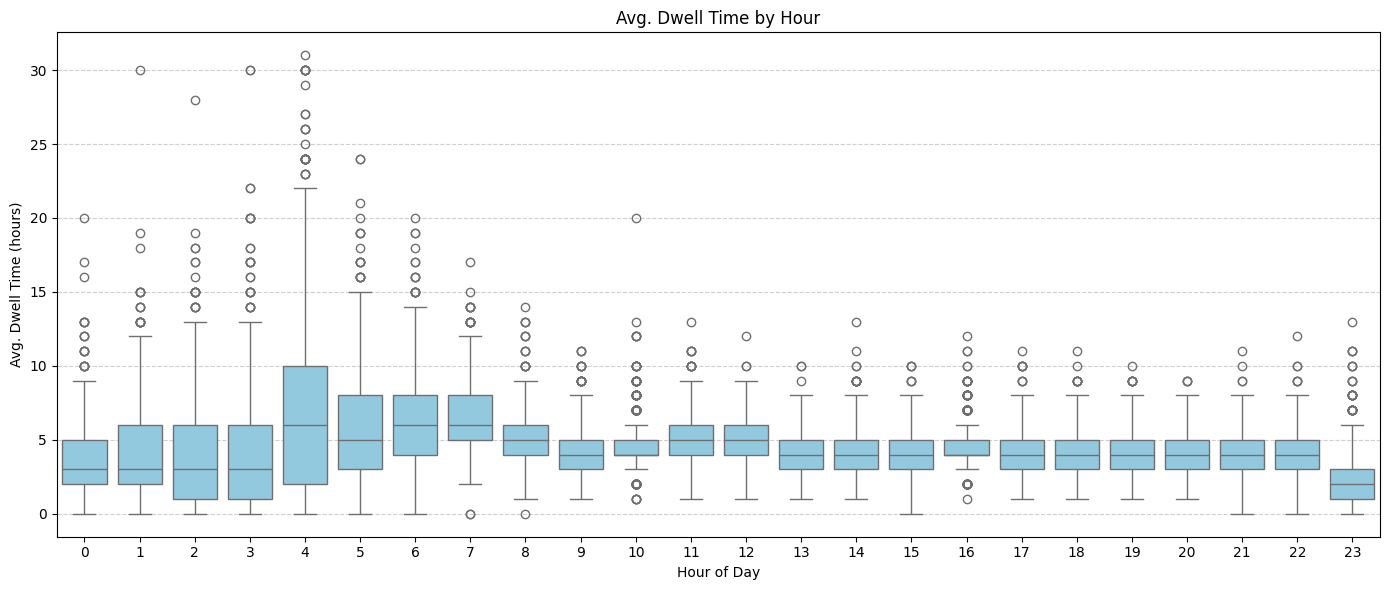

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_park, x='hour', y='avg_dwell', color='skyblue')
plt.title('Avg. Dwell Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg. Dwell Time (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\1542619453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['hour'] = pd.to_datetime(df_park['datetime']).dt.hour


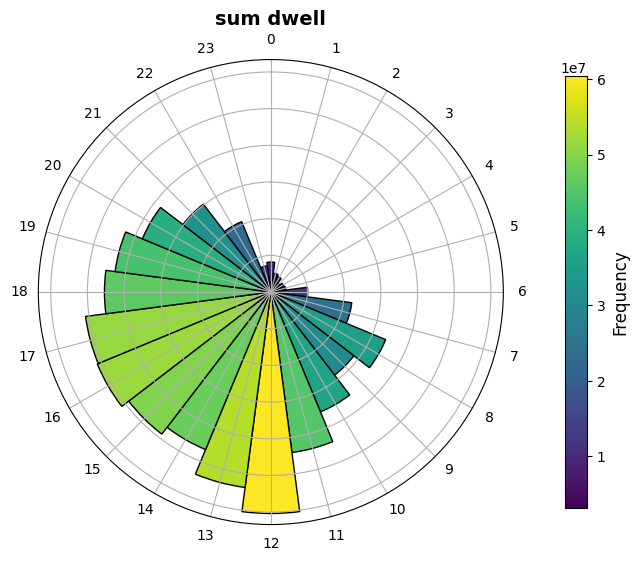

In [35]:
df_park['hour'] = pd.to_datetime(df_park['datetime']).dt.hour

hours = df_park.groupby('hour')['dwell'].sum()

#hours = df_park['time'].value_counts().sort_index()
angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)
widths = np.pi / 12 
colors = plt.cm.viridis(hours.values / hours.values.max())

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hours.values, width=widths, color=colors, edgecolor='black')

# Make the chart look like a clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(vmin=hours.values.min(), vmax=hours.values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Frequency',fontsize=12)

# Set labels and title
ax.set_xticks(angles)
ax.set_xticklabels(hours.index, fontsize=10)
ax.set_yticklabels([])
ax.set_title('sum dwell', fontsize=14, fontweight='bold')

# Show plot
plt.show()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\2240503620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['hour'] = pd.to_datetime(df_park['datetime']).dt.hour


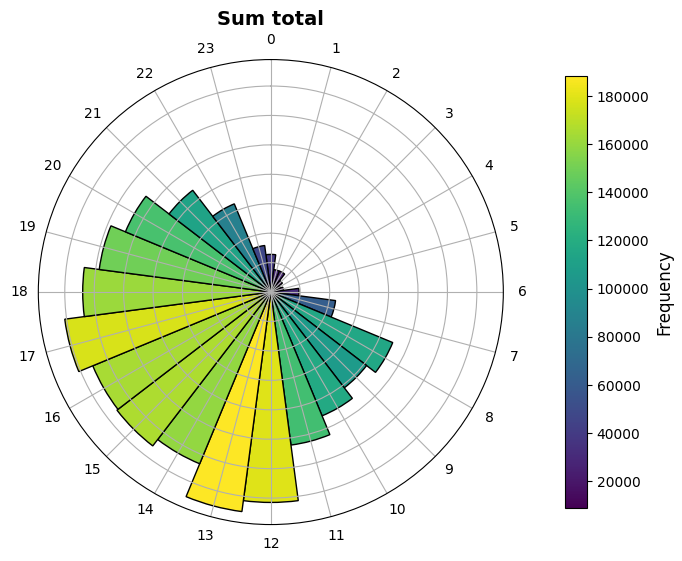

In [37]:
df_park['hour'] = pd.to_datetime(df_park['datetime']).dt.hour
hours = df_park.groupby('hour')['total'].sum()
#hours = df_park.groupby('hour')['avg_dwell'].mean()

#hours = df_park['time'].value_counts().sort_index()
angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)
widths = np.pi / 12 
colors = plt.cm.viridis(hours.values / hours.values.max())

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hours.values, width=widths, color=colors, edgecolor='black')

# Make the chart look like a clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(vmin=hours.values.min(), vmax=hours.values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Frequency',fontsize=12)

# Set labels and title
ax.set_xticks(angles)
ax.set_xticklabels(hours.index, fontsize=10)
ax.set_yticklabels([])
ax.set_title('Sum total', fontsize=14, fontweight='bold')

# Show plot
plt.show()

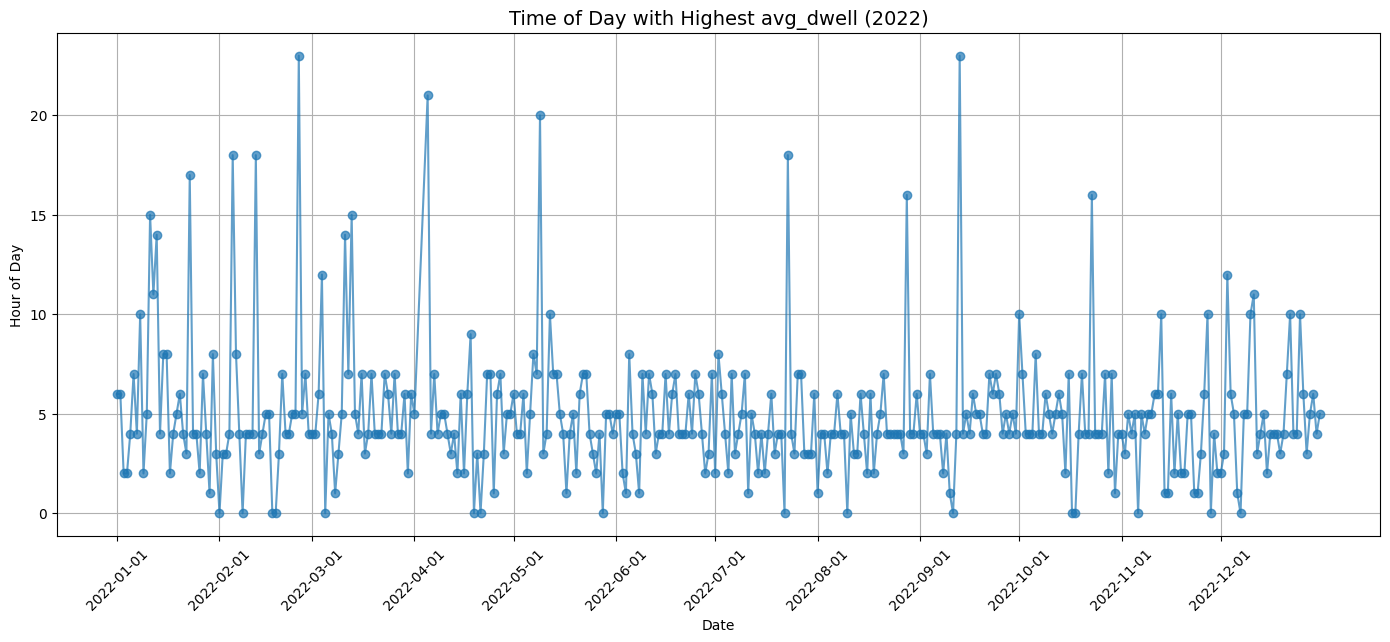

In [18]:
## NOGET ER GALT MED DENNE KODE!!!###
#Jeg skal jo IKKE definere df_park til at læse hele filen igen?!!! 
#Jeg skal tjekke denne kode igennem igen for at være sikker på, at der ikke er noget andet, som er galt
##TJEKKET alt er vist fint nu
'''
##SLET: df_park = pd.read_csv("blix-visits.csv") #
df_park['datetime'] = pd.to_datetime(df_park['datetime'], utc=True)
df_park['avg_dwell'] = pd.to_numeric(df_park['avg_dwell'], errors='coerce')
'''
df_2022 = df_park[df_park['datetime'].dt.year == 2022].copy()
df_2022['date'] = df_2022['datetime'].dt.date
df_2022['hour'] = df_2022['datetime'].dt.hour

daily_peak_hour_2022 = df_2022.groupby(['date', 'hour'])['avg_dwell'].mean().unstack().idxmax(axis=1)
daily_peak_hour_2022 = daily_peak_hour_2022.sort_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_peak_hour_2022.index, daily_peak_hour_2022.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Time of Day with Highest avg_dwell (2022)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.grid(True)
plt.tight_layout()
monthly_ticks = pd.date_range(start=daily_peak_hour_2022.index.min(),
                              end=daily_peak_hour_2022.index.max(),
                              freq='MS')  # 'MS' = Month Start
plt.xticks(monthly_ticks, rotation=45)
plt.show()


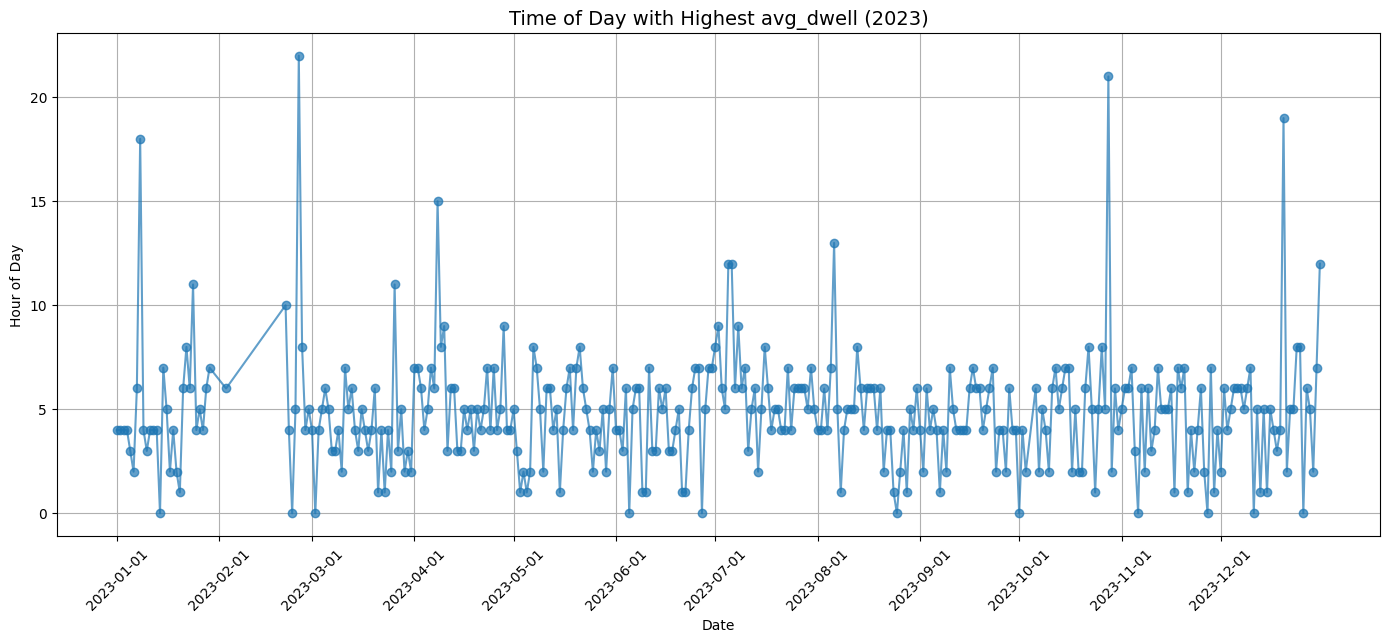

In [19]:
df_2023 = df_park[df_park['datetime'].dt.year == 2023].copy()
df_2023['date'] = df_2023['datetime'].dt.date
df_2023['hour'] = df_2023['datetime'].dt.hour

daily_peak_hour_2023 = df_2023.groupby(['date', 'hour'])['avg_dwell'].mean().unstack().idxmax(axis=1)
daily_peak_hour_2023 = daily_peak_hour_2023.sort_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_peak_hour_2023.index, daily_peak_hour_2023.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Time of Day with Highest avg_dwell (2023)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.grid(True)
plt.tight_layout()
monthly_ticks = pd.date_range(start=daily_peak_hour_2023.index.min(),
                              end=daily_peak_hour_2023.index.max(),
                              freq='MS')  # 'MS' = Month Start
plt.xticks(monthly_ticks, rotation=45)
plt.show()

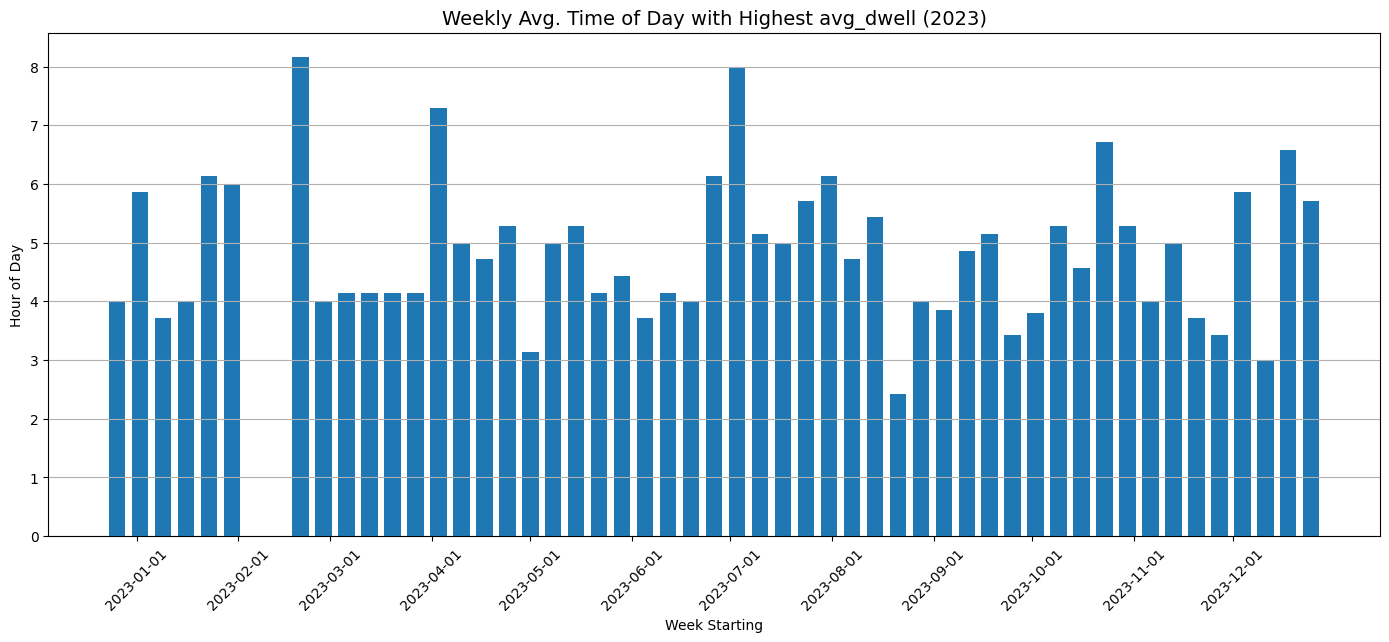

In [20]:
##Genbruger noget af ovennævnte kode.

# Gruppér til uger og beregn gennemsnitlig peak-hour per uge
weekly_peak_hour = daily_peak_hour_2023.groupby(
    pd.to_datetime(daily_peak_hour_2023.index).to_period('W').to_timestamp()
).mean()

# Plot søjlediagram
plt.figure(figsize=(14, 6))
plt.bar(weekly_peak_hour.index, weekly_peak_hour.values, width=5, align='center')
plt.title('Weekly Avg. Time of Day with Highest avg_dwell (2023)', fontsize=14)
plt.xlabel('Week Starting')
plt.ylabel('Hour of Day')
plt.grid(axis='y')
plt.tight_layout()
monthly_ticks = pd.date_range(start=daily_peak_hour_2023.index.min(),
                              end=daily_peak_hour_2023.index.max(),
                              freq='MS')  # 'MS' = Month Start
plt.xticks(monthly_ticks, rotation=45)
plt.show()


C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\4195845399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['weekday'] = df_park['datetime'].dt.day_name()


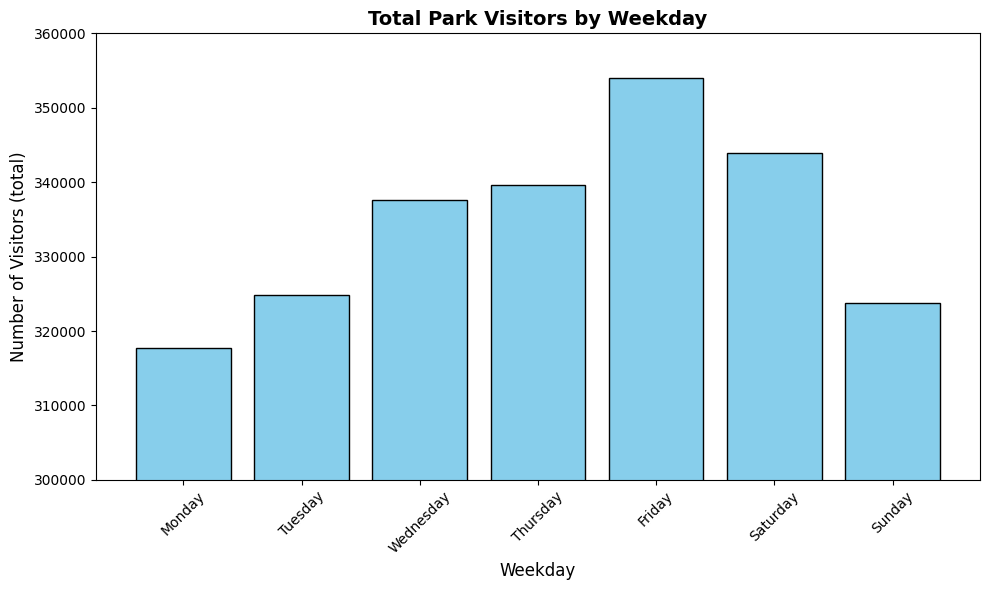

In [21]:
df_park['weekday'] = df_park['datetime'].dt.day_name()
weekday_totals = df_park.groupby('weekday')['total'].sum()

# Sørg for rigtig rækkefølge (Monday → Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_totals = weekday_totals.reindex(ordered_days)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(weekday_totals.index, weekday_totals.values, color='skyblue', edgecolor='black')
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Visitors (total)', fontsize=12)
plt.title('Total Park Visitors by Weekday', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

# Zoom ind på interessant interval
plt.ylim(300000, 360000)

plt.tight_layout()
plt.show()


C:\Users\Bruger\AppData\Local\Temp\ipykernel_4120\2023140845.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


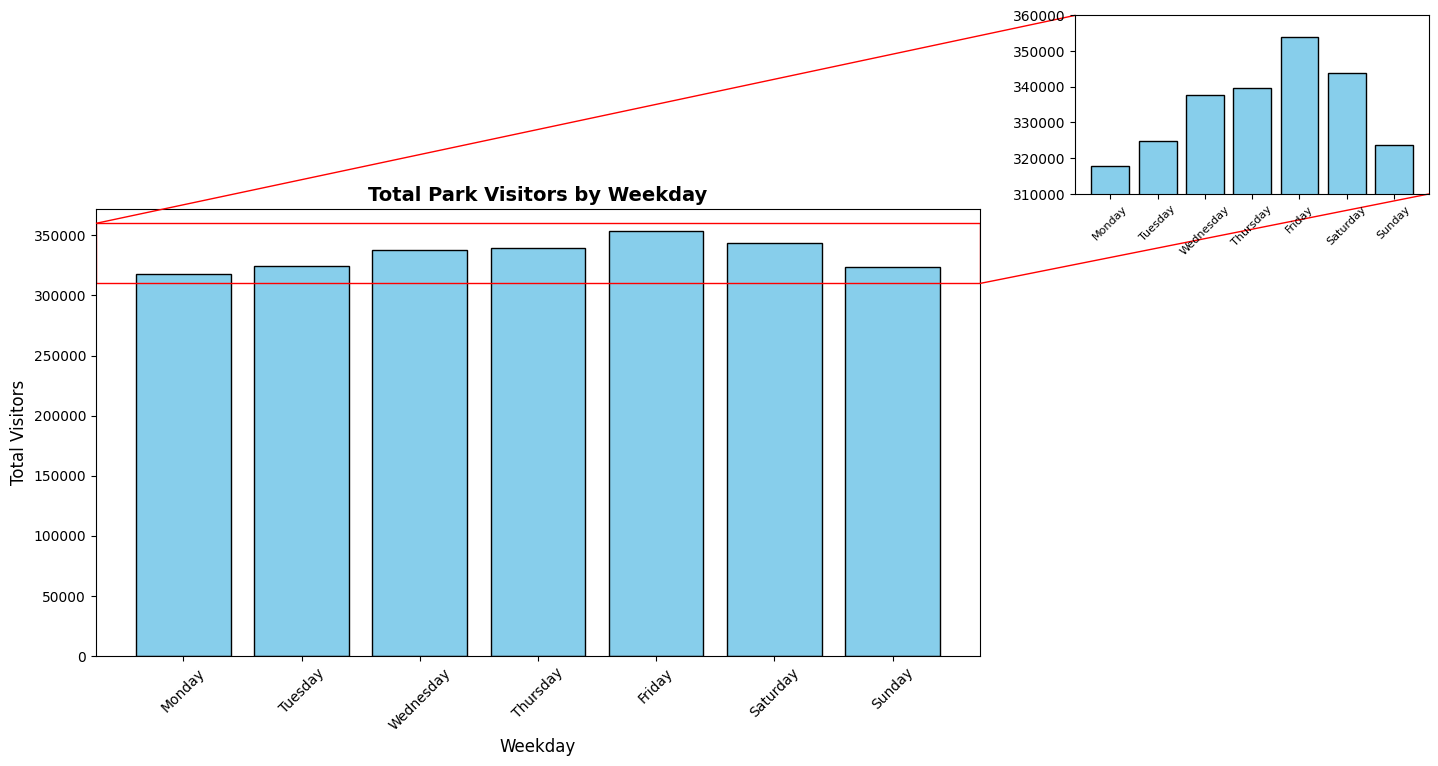

In [22]:
# Hovedplot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(weekday_totals.index, weekday_totals.values, color='skyblue', edgecolor='black')
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Total Visitors', fontsize=12)
ax.set_title('Total Park Visitors by Weekday', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Indsæt et zoom-ind-plot (inset)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

#axins = inset_axes(ax, width="40%", height="40%", loc='upper right')  # justér position & størrelse
axins = inset_axes(ax, width="40%", height="40%", 
                   bbox_to_anchor=(1.10, 0.45, 1, 1), 
                   bbox_transform=ax.transAxes, loc='upper left')

axins.bar(weekday_totals.index, weekday_totals.values, color='skyblue', edgecolor='black')

# Zoom-ind område (fx mellem 300000 og 350000)
axins.set_ylim(310000, 360000)
axins.tick_params(axis='x', rotation=45)
axins.set_xticks(range(len(weekday_totals.index)))
axins.set_xticklabels(weekday_totals.index, rotation=45, fontsize=8)


# Marker sammenhæng mellem plot og inset (valgfrit)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="red")

plt.tight_layout()
plt.show()


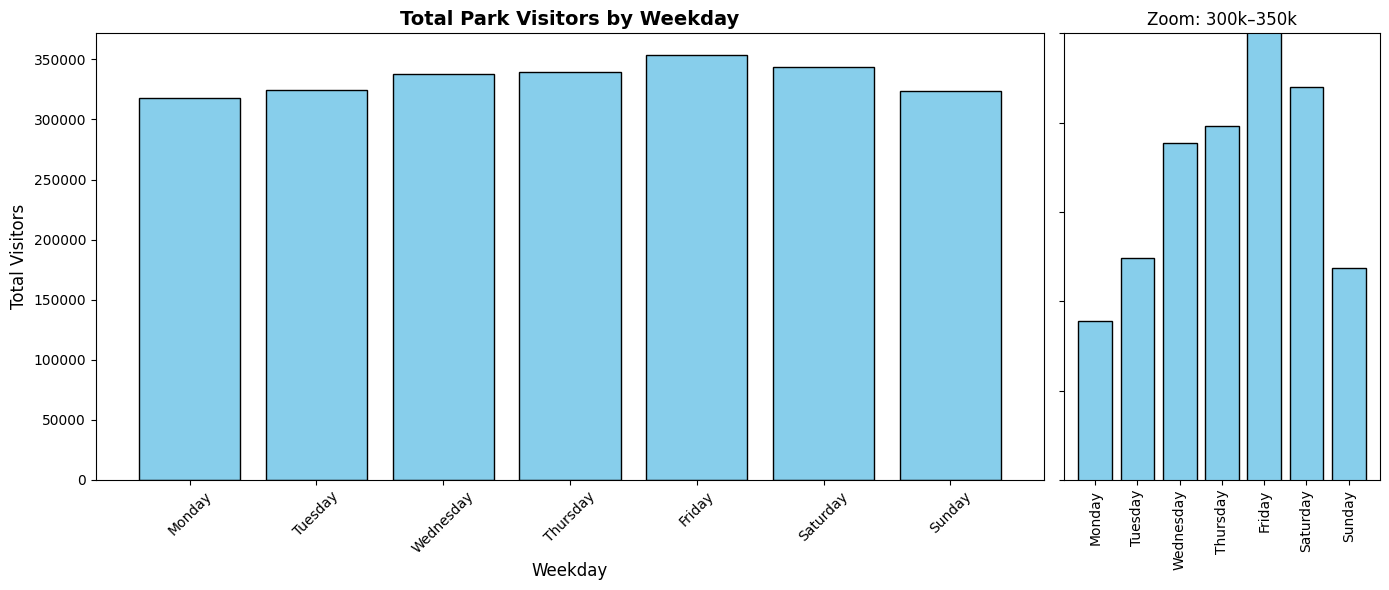

In [23]:
fig, (ax_main, ax_zoom) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1]})

# Hoveddiagram
ax_main.bar(weekday_totals.index, weekday_totals.values, color='skyblue', edgecolor='black')
ax_main.set_xlabel('Weekday', fontsize=12)
ax_main.set_ylabel('Total Visitors', fontsize=12)
ax_main.set_title('Total Park Visitors by Weekday', fontsize=14, fontweight='bold')
ax_main.tick_params(axis='x', rotation=45)

# Zoomet udsnit
ax_zoom.bar(weekday_totals.index, weekday_totals.values, color='skyblue', edgecolor='black')
ax_zoom.set_ylim(300000, 350000)  # Zoomområde
ax_zoom.set_title('Zoom: 300k–350k', fontsize=12)
ax_zoom.tick_params(axis='x', rotation=90)

# Fjerne y-aksens tekst på zoomet plot (valgfrit)
ax_zoom.set_yticklabels([])

plt.tight_layout()
plt.show()


In [24]:
'''
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Legend, LegendItem, NumeralTickFormatter
from bokeh.palettes import Category10
import pandas as pd

def create_avg_dwell_peak_hour_comparison(df):
    # Forbered data
    df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
    df['datetime'] = df['datetime'].dt.tz_convert('Australia/Melbourne')
    df['avg_dwell'] = pd.to_numeric(df['avg_dwell'], errors='coerce')
    df['date'] = df['datetime'].dt.date
    df['hour'] = df['datetime'].dt.hour
    df['year'] = df['datetime'].dt.year

    # Find time med højest avg_dwell for hver dag
    daily_peak_by_year = {}
    for year in [2022, 2023, 2024]:
        daily = df[df['year'] == year]
        peak = daily.groupby(['date', 'hour'])['avg_dwell'].mean().unstack().idxmax(axis=1)
        daily_peak_by_year[year] = peak.sort_index()

    # Lav farver til hvert år
    years = list(daily_peak_by_year.keys())
    color_map = {year: Category10[10][i % 10] for i, year in enumerate(years)}

    # Opret Bokeh-plot
    p = figure(
        title="Time of Day with Highest avg_dwell per Day",
        width=1200,
        height=600,
        x_axis_type='datetime',
        tools="hover,pan,box_zoom,reset",
        tooltips="@label: @hour"
    )

    legend_items = []

    for year in years:
        data = daily_peak_by_year[year]
        source = ColumnDataSource(data={
            'date': list(data.index),
            'hour': list(data.values),
            'label': [str(year)] * len(data)
        })

        r = p.line(
            x='date',
            y='hour',
            source=source,
            line_width=2,
            color=color_map[year],
            alpha=0.6,
            muted_alpha=0.1,
            muted=False,
            name=str(year)
        )
        legend_items.append(LegendItem(label=str(year), renderers=[r]))

    # Tilføj legend
    legend = Legend(items=legend_items, click_policy="mute", location="center")
    p.add_layout(legend, 'right')

    # Akseformatering
    p.xaxis.axis_label = "Date"
    p.yaxis.axis_label = "Hour of Day"
    p.yaxis.ticker = list(range(0, 24))
    p.ygrid.grid_line_alpha = 0.3

    return p

# Usage
df = pd.read_csv("blix-visits.csv")
plot = create_avg_dwell_peak_hour_comparison(df)
show(plot)
'''


'\nfrom bokeh.plotting import figure, show\nfrom bokeh.models import ColumnDataSource, Legend, LegendItem, NumeralTickFormatter\nfrom bokeh.palettes import Category10\nimport pandas as pd\n\ndef create_avg_dwell_peak_hour_comparison(df):\n    # Forbered data\n    df[\'datetime\'] = pd.to_datetime(df[\'datetime\'], utc=True)\n    df[\'datetime\'] = df[\'datetime\'].dt.tz_convert(\'Australia/Melbourne\')\n    df[\'avg_dwell\'] = pd.to_numeric(df[\'avg_dwell\'], errors=\'coerce\')\n    df[\'date\'] = df[\'datetime\'].dt.date\n    df[\'hour\'] = df[\'datetime\'].dt.hour\n    df[\'year\'] = df[\'datetime\'].dt.year\n\n    # Find time med højest avg_dwell for hver dag\n    daily_peak_by_year = {}\n    for year in [2022, 2023, 2024]:\n        daily = df[df[\'year\'] == year]\n        peak = daily.groupby([\'date\', \'hour\'])[\'avg_dwell\'].mean().unstack().idxmax(axis=1)\n        daily_peak_by_year[year] = peak.sort_index()\n\n    # Lav farver til hvert år\n    years = list(daily_peak_by_yea

### Always last: Save the dataset

In [25]:
visits_df = df_park
visits_df_2022 = df_2022
visits_df_2023 = df_2023

df_2024 = df_park[df_park['datetime'].dt.year == 2024].copy()
visits_df_2024 = df_2024

visits_df.to_csv("visits_df.csv", index=False)
visits_df_2022.to_csv("visits_df_2022.csv", index=False)
visits_df_2023.to_csv("visits_df_2023.csv", index=False)
visits_df_2024.to_csv("visits_df_2024.csv", index=False)

In [26]:
visits_df_2022.head()

datetime  venueId  total   dwell  \
7  2022-12-16 21:00:00+11:00     7780    422  107188   
18 2022-12-23 14:00:00+11:00     7780    351  170937   
19 2022-12-23 21:00:00+11:00     7780    504  193032   
30 2022-12-28 03:00:00+11:00     7780     13    2574   
31 2022-12-28 04:00:00+11:00     7780      5    2340   

                    Sensor Name            Sensor Type  \
7   Pedestrian Sensor-Argyle Sq  Mobile phone counting   
18  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
19  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
30  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
31  Pedestrian Sensor-Argyle Sq  Mobile phone counting   

                    Lat Long  avg_dwell  Latitude   Longitude        date  \
7   -37.8025805, 144.9656012        4.0 -37.80258  144.965601  2022-12-16   
18  -37.8025805, 144.9656012        8.0 -37.80258  144.965601  2022-12-23   
19  -37.8025805, 144.9656012        6.0 -37.80258  144.965601  2022-12-23   
30  -37.8025805, 144.9656012        3.0 -37.80258  144.965601  2022-12-28   
31  -37.8025805, 144.9656012        7.0 -37.80258  144.965601  2022-12-28   

        time  hour  
7   21:00:00    21  
18  14:00:00    14  
19  21:00:00    21  
30  03:00:00     3  
31  04:00:00     4

In [27]:
visits_df_2023.head()

datetime  venueId  total  dwell  \
116 2023-01-13 16:00:00+11:00     7780    160  43680   
126 2023-01-08 10:00:00+11:00     7780     74  29674   
170 2023-01-16 05:00:00+11:00     7780      7   7203   
200 2023-01-04 13:00:00+11:00     7780    113  23391   
204 2023-01-04 03:00:00+11:00     7780      6    480   

                     Sensor Name            Sensor Type  \
116  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
126  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
170  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
200  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
204  Pedestrian Sensor-Argyle Sq  Mobile phone counting   

                     Lat Long  avg_dwell  Latitude   Longitude        date  \
116  -37.8025805, 144.9656012        4.0 -37.80258  144.965601  2023-01-13   
126  -37.8025805, 144.9656012        6.0 -37.80258  144.965601  2023-01-08   
170  -37.8025805, 144.9656012       17.0 -37.80258  144.965601  2023-01-16   
200  -37.8025805, 144.9656012        3.0 -37.80258  144.965601  2023-01-04   
204  -37.8025805, 144.9656012        1.0 -37.80258  144.965601  2023-01-04   

         time  hour  
116  16:00:00    16  
126  10:00:00    10  
170  05:00:00     5  
200  13:00:00    13  
204  03:00:00     3

In [28]:
visits_df_2024.head()

datetime  venueId  total  dwell  \
14019 2024-06-06 00:00:00+10:00     7780     41  10127   
14020 2024-06-06 08:00:00+10:00     7780      0      0   
16961 2024-01-02 06:00:00+11:00     7780     18   5274   
16971 2024-01-02 09:00:00+11:00     7780     93  20553   
16976 2024-01-02 04:00:00+11:00     7780      6      0   

                       Sensor Name            Sensor Type  \
14019  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
14020  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
16961  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
16971  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
16976  Pedestrian Sensor-Argyle Sq  Mobile phone counting   

                       Lat Long  avg_dwell  Latitude   Longitude        date  \
14019  -37.8025805, 144.9656012        4.0 -37.80258  144.965601  2024-06-06   
14020  -37.8025805, 144.9656012        NaN -37.80258  144.965601  2024-06-06   
16961  -37.8025805, 144.9656012        4.0 -37.80258  144.965601  2024-01-02   
16971  -37.8025805, 144.9656012        3.0 -37.80258  144.965601  2024-01-02   
16976  -37.8025805, 144.9656012        0.0 -37.80258  144.965601  2024-01-02   

           time  hour   weekday  
14019  00:00:00     0  Thursday  
14020  08:00:00     8  Thursday  
16961  06:00:00     6   Tuesday  
16971  09:00:00     9   Tuesday  
16976  04:00:00     4   Tuesday